In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

In [13]:
incident_angles = np.array([50, 60, 70, 80]) # incident angle in degrees
trial1_distances = np.array([1, 1.25, 1.4, 1.65])
trial2_distances = np.array([1.05, 1.15, 1.5, 1.7])
trial3_distances = np.array([1.2, 1.25, 1.5, 1.6])

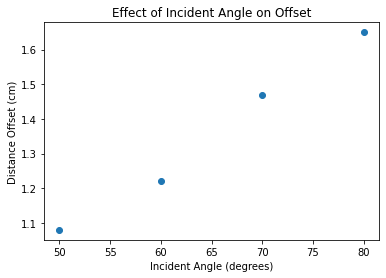

In [14]:
# plt.scatter(incident_angles, trial1_distances)
# plt.scatter(incident_angles, trial2_distances)
# plt.scatter(incident_angles, trial3_distances)
plt.scatter(incident_angles, [1.08, 1.22, 1.47, 1.65])
plt.xlabel('Incident Angle (degrees)')
plt.ylabel('Distance Offset (cm)')
plt.title('Effect of Incident Angle on Offset')
plt.show()

Index of refraction:  [1.54452594]


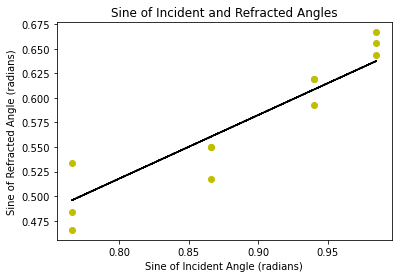

In [15]:
x = np.concatenate((incident_angles, incident_angles, incident_angles))
y = np.concatenate((trial1_distances, trial2_distances, trial3_distances))
x = np.sin(x / 180 * np.pi)  # sine of incident angle in radians
y = np.sin(np.arctan(y / 1.9)) # sine of refracted angle in radians
a, _, _, _ = np.linalg.lstsq(x[:,np.newaxis], y, rcond=None)  # linear fit with y-intercept = 0
plt.plot(x,y, 'yo', x, a*x, '--k')
plt.xlabel('Sine of Incident Angle (radians)')
plt.ylabel('Sine of Refracted Angle (radians)')
plt.title('Sine of Incident and Refracted Angles')
print('Index of refraction: ', 1/a)

In [25]:
dof = len(x) - 1
chi_square = np.sum(((y - a*x))**2)/0.1
print('Reduced chi square:', chi_square/dof)

Reduced chi square: 0.0057287844629862065
